In [59]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [60]:
n = 10
A = np.eye(n) * np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)

In [61]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_2 = lambda x: A.T @ A

In [127]:
def bin_search(a, b, pk, xk, grad, func, c1, c2):
    while b - a > 1e-6:
        c = (a + b) / 2
        t = func(xk + c * pk)
        if func(xk + c * pk) > func(xk) + c1 * b * grad(xk).T @ pk:
            b = c
        else:
            a = c
    return b

In [126]:
def bin_search_ray_max(a, b, pk, xk, grad, func, c1, c2):
    c = (a + b) / 2
    if abs(grad(xk + c * pk).T @ pk) > c2 * abs(grad(xk).T @ pk):
        return bin_search(a, c, pk, xk, grad, func, c1, c2)
    else:
        return bin_search_ray_max(c, 2 * b, pk, xk, grad, func, c1, c2) 

In [156]:
def FBGS(x0, func, grad, grad_2, eps, alf, c1=1e-3, c2=0.999):
    xk = x0.copy()
    res = [func(xk)]
    hk = np.ones((len(xk), len(xk))) * 0.1
    while True:
        xk_prev = xk.copy()
        pk = -hk @ grad(xk)
        #alf = bin_search_ray_max(0, 1, pk, xk, grad, func, c1, c2)
        xk += alf * pk 
        
        delt_grad = grad(xk) - grad(xk_prev)
        delt_x = xk - xk_prev
        
        p_not_pk = 1 / (delt_grad.T @ delt_x)
        t = np.outer(delt_grad, delt_x)
        tm = np.eye(len(xk)) - p_not_pk * t
        tmp = np.eye(len(xk)) - p_not_pk * t.T
        hk = tmp @ hk @ tm + p_not_pk * np.outer(delt_x, delt_x)
        res.append(func(xk))
        if abs(res[-1] - res[-2]) < eps:
            break
    return res

In [157]:
res = FBGS(x0, func, grad, grad_2, 1e-6, 0.1)

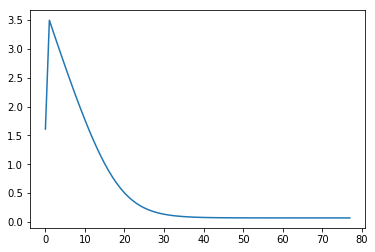

In [158]:
plt.plot(np.log(res))
plt.show()